In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from matplotlib.colors import LogNorm

In [2]:
feature_names = []
with open('../Data/mushroom.map') as fmap:
    for line in fmap:
        [index, name, junk] = line.split()
        feature_names.append(name)

print 'Loaded feature names:', len(feature_names)

Loaded feature names: 126


In [3]:
X, Y = [], []

with open('../Data/mushroom.data') as fdata:
    for line in fdata:
        items = line.split()
        Y.append(int(items.pop(0)))
        x = np.zeros(len(feature_names))
        for item in items:
            feature = int(item.split(':')[0])
            x[feature] = 1
        X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print train_data.shape, test_data.shape

(7000, 126) (1124, 126)


,Explained Variance,Cumulative Explained Variance
1,0.164043,0.164043
2,0.133235,0.297278
3,0.101735,0.399013
4,0.070634,0.469646
5,0.038666,0.508313
6,0.036808,0.545121
7,0.031282,0.576403
8,0.027337,0.603741
9,0.026165,0.629905
10,0.022309,0.652215


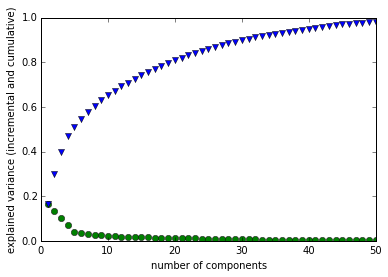

In [4]:
import pandas as pd
n = 50
pca = PCA(n_components = n)
pca.fit(train_data)
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

N = range(1, n + 1)

plt.plot(N, explained_variance, 'go', N, cumulative_explained_variance, 'bv')
plt.xlabel('number of components')
plt.ylabel('explained variance (incremental and cumulative)')

data_frame = pd.DataFrame(index = N )
data_frame['Explained Variance'] = explained_variance
data_frame['Cumulative Explained Variance'] = cumulative_explained_variance

data_frame

In [5]:
pca = PCA(n_components = 2)
pca.fit(train_data)

PCA(copy=True, n_components=2, whiten=False)

In [6]:
train_2d = pca.transform(train_data)
np.shape(train_labels)

(7000,)

In [7]:
train_labels

array([1, 0, 0, ..., 1, 0, 0])

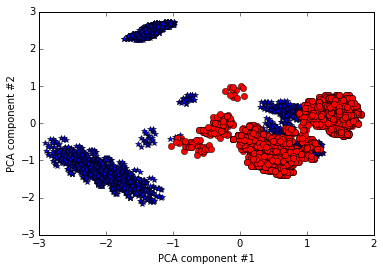

In [8]:

pca = PCA(n_components = 2)
pca.fit(train_data)


train_2d = pca.transform(train_data)

train_2d_poisonous = [ train_2d[index] for index, is_poisonous in enumerate(train_labels) if is_poisonous == 1]
train_2d_nonpoisonous = [ train_2d[index] for index, is_poisonous in enumerate(train_labels) if is_poisonous == 0]
transpose_train_2d_poisonous = np.transpose(train_2d_poisonous)
transpose_train_2d_nonpoisonous = np.transpose(train_2d_nonpoisonous)

plt.plot(
    transpose_train_2d_poisonous[0], transpose_train_2d_poisonous[1], 'b*', 
    transpose_train_2d_nonpoisonous[0], transpose_train_2d_nonpoisonous[1], 'ro'
)
plt.xlabel('PCA component #1')
plt.ylabel('PCA component #2')

plt.show();


In [9]:
pca = PCA(n_components = 2)
pca.fit(train_data)
train_2d = pca.transform(train_data)
train_2d_poisonous = [ train_2d[index] for index, is_poisonous in enumerate(train_labels) if is_poisonous == 1]
train_2d_nonpoisonous = [ train_2d[index] for index, is_poisonous in enumerate(train_labels) if is_poisonous == 0]
poisonous_transpose = np.transpose(poisonous)
nonpoisonous_transpose = np.transpose(nonpoisonous)




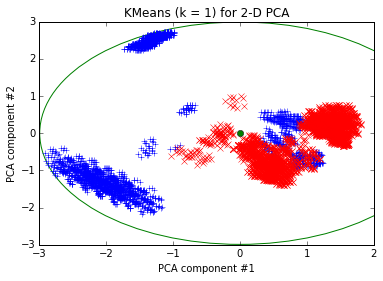

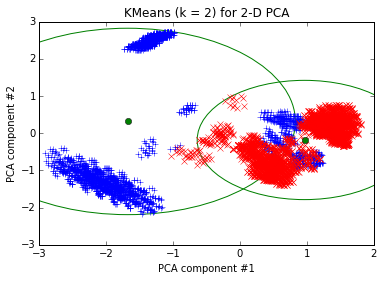

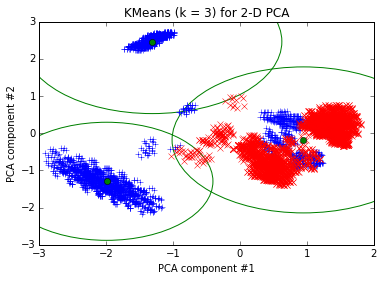

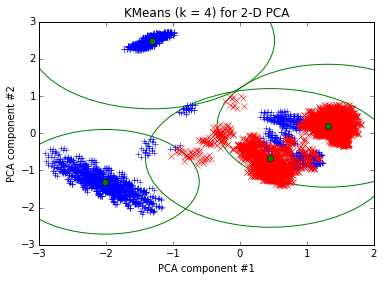

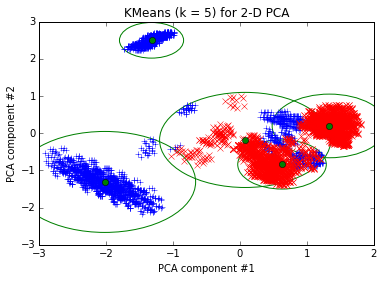

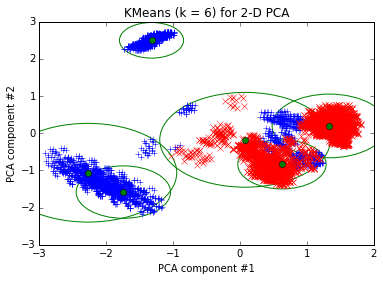

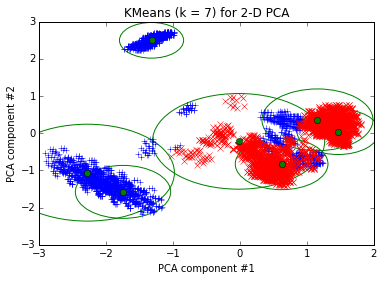

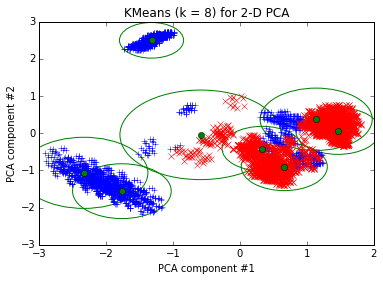

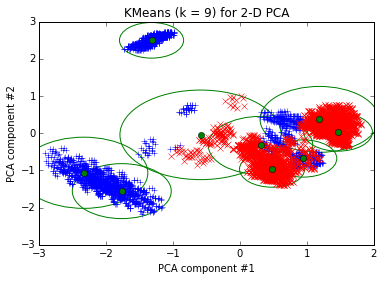

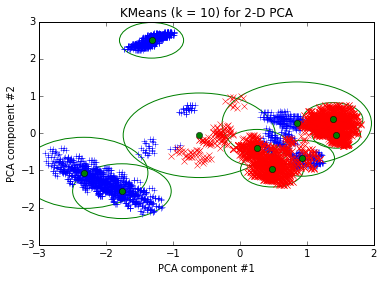

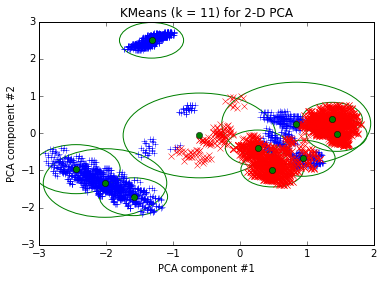

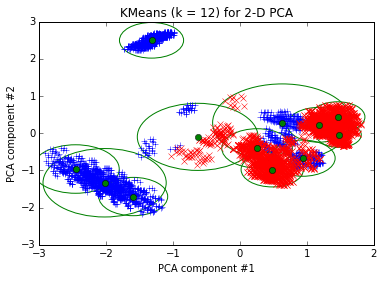

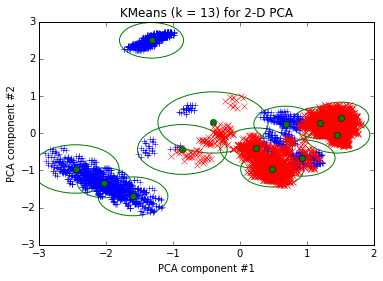

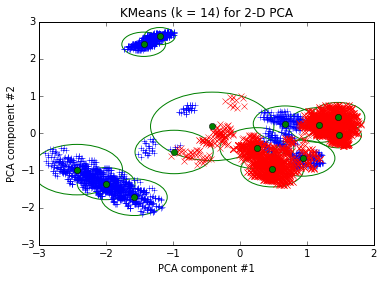

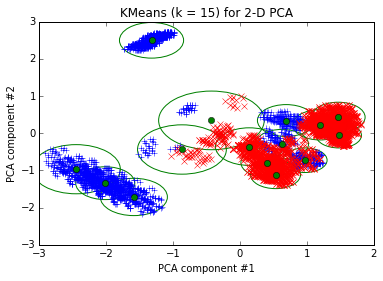

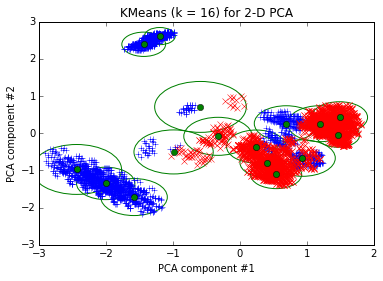

In [49]:
from scipy.spatial import distance

def kmeans_with_plot(all, poisonous, nonpoisonous, n_clusters = 1):
    
    poisonous_transpose = np.transpose(poisonous)
    nonpoisonous_transpose = np.transpose(nonpoisonous)
    
    plt.figure(n_clusters)
    
    
    k_means = KMeans(n_clusters = n_clusters)
    k_means.fit(all)
    
    cluster_assignments = k_means.predict(all)
    cluster_centers = k_means.cluster_centers_
    
    centers = [ ]
    
    # not optimal to go through the array n_clusters times, but clearest code
    for cluster_index, center in enumerate(cluster_centers):
        assigned = [ 
            point 
            for point_index, point 
            in enumerate(all) 
            if cluster_assignments[point_index] == cluster_index
        ]
        distances = [ distance.euclidean(center, point) for point in assigned ]
        radius = max(distances)

        circle = plt.Circle(center, radius, color='g', fill=False)
        plt.gca().add_artist(circle)
        
        centers.append(center)
    
    centers_transpose = np.transpose(centers)
    
    plt.plot(
        poisonous_transpose[0], poisonous_transpose[1], 'b+', 
        nonpoisonous_transpose[0], nonpoisonous_transpose[1], 'rx',
        centers_transpose[0], centers_transpose[1], 'go'
    )
    
    plt.xlabel('PCA component #1')
    plt.ylabel('PCA component #2')

    plt.title('KMeans (k = ' + str(n_clusters) + ') for 2-D PCA');
        
    return k_means

for n_clusters in range(1, 17):
    k_means = kmeans_with_plot(train_2d, train_2d_poisonous, train_2d_nonpoisonous, n_clusters)

plt.plot();


In [52]:
pca = PCA(n_components = 2)
pca.fit(train_data)
train_2d = pca.transform(train_data)
train_2d_poisonous = [ train_2d[index] for index, is_poisonous in enumerate(train_labels) if is_poisonous == 1]
train_2d_nonpoisonous = [ train_2d[index] for index, is_poisonous in enumerate(train_labels) if is_poisonous == 0]
train_2d_poisonous_transpose = np.transpose(train_2d_poisonous)
train_2d_nonpoisonous_transpose = np.transpose(train_2d_nonpoisonous)


//anaconda/lib/python2.7/site-packages/matplotlib/contour.py:1516: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


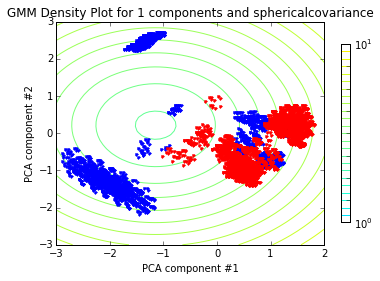

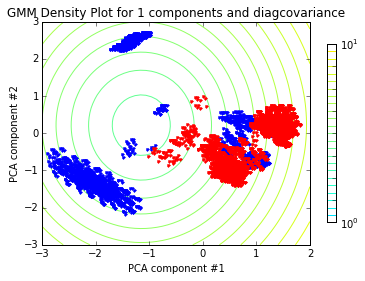

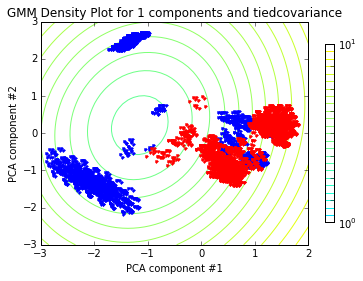

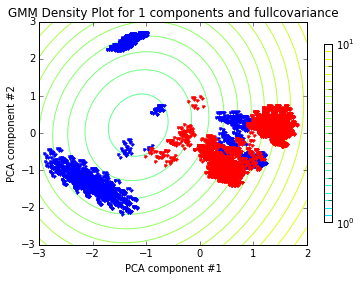

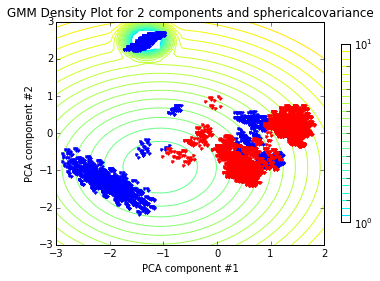

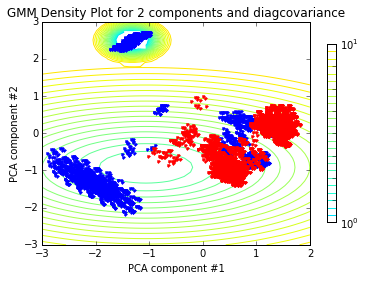

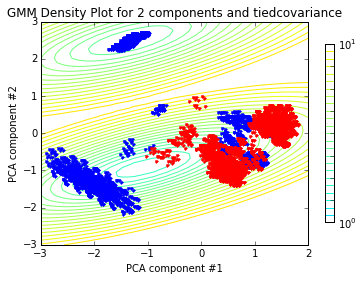

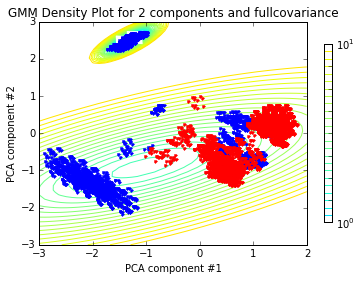

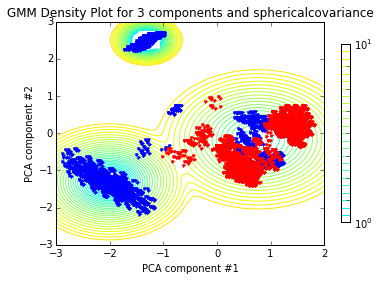

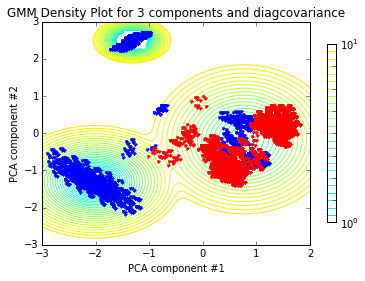

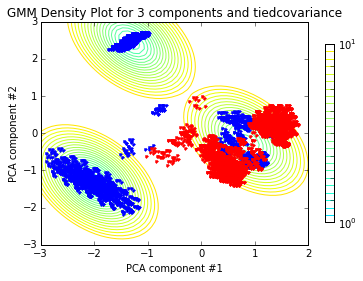

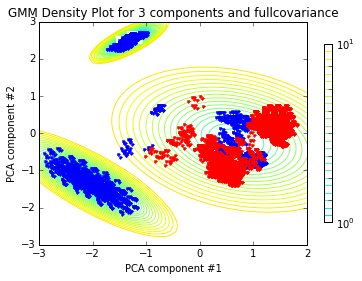

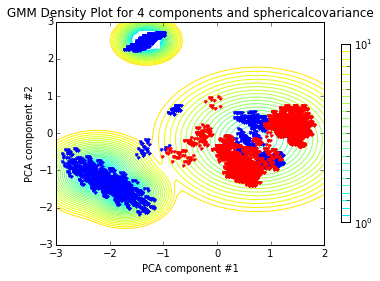

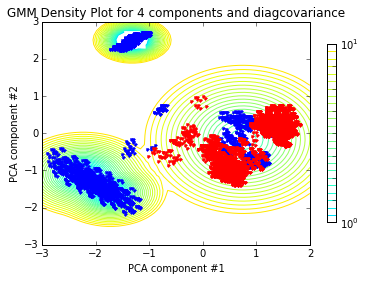

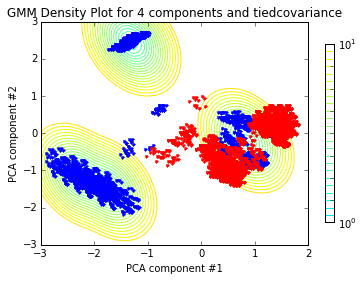

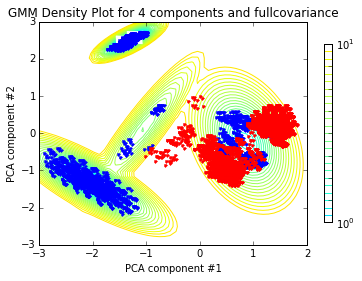

In [104]:
def fit_and_show_poisonous_gmm(n_components = 1, covariance_type = 'spherical', figure_number = 1):
    plt.figure(figure_number)
    
    poisonous_gmm = GMM(n_components = n_components, covariance_type = covariance_type)
    poisonous_gmm.fit(train_2d_poisonous)

    x = np.linspace(-3.0, 2.0)
    y = np.linspace(-3.0, 3.0)
    X, Y = np.meshgrid(x, y)
    XX = np.array([X.ravel(), Y.ravel()]).T
    Z = -poisonous_gmm.score_samples(XX)[0]
    Z = Z.reshape(X.shape)



    plt.plot(
        train_2d_poisonous_transpose[0], train_2d_poisonous_transpose[1], 'b.', 
        train_2d_nonpoisonous_transpose[0], train_2d_nonpoisonous_transpose[1], 'r.'
    )
    CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=0.1, vmax=100.0),
                     levels=np.logspace(0, 1, 25))
    CB = plt.colorbar(CS, shrink=0.8, extend='both')
    
    plt.xlabel('PCA component #1')
    plt.ylabel('PCA component #2')
    plt.title('GMM Density Plot for ' 
              + str(n_components) + ' components and ' 
              + covariance_type + 'covariance')

def P4(min_components = 1, max_components = 4):
    figure_number = 1
    for n_components in range(min_components, max_components + 1):
        for covariance_type in ('spherical', 'diag', 'tied', 'full'):
            fit_and_show_poisonous_gmm(
                n_components = n_components, 
                covariance_type = covariance_type, 
                figure_number = figure_number
            )
            
            figure_number = figure_number + 1
    plt.plot();
P4()


In [111]:
n_components = 4
covariance_type = 'full'

poisonous_gmm = GMM(n_components = n_components, covariance_type = covariance_type)
poisonous_gmm.fit(train_2d_poisonous)

nonpoisonous_gmm = GMM(n_components = n_components, covariance_type = covariance_type)
nonpoisonous_gmm.fit(train_2d_nonpoisonous)

test_2d = pca.transform(test_data)
poisonous_probabilities = poisonous_gmm.score( test_2d )
nonpoisonous_probabilities = nonpoisonous_gmm.score( test_2d )

def map_to_0_or_1(poisonous_value, nonpoisonous_value):
    if poisonous_value > nonpoisonous_value:
        return 1
    else:
        return 0

predicted_labels = [
    map_to_0_or_1(poisonous_probabilities[index], nonpoisonous_probabilities[index])
    for index, example 
    in enumerate(test_2d)
]

metrics.accuracy_score( test_labels, predicted_labels )


0.95017793594306055

In [119]:
def pca_fit_gmm_and_score(pca_components = 2, gmm_components = 4, covariance_type = 'full'):
    pca = PCA(n_components = pca_components)
    pca.fit(train_data)
    
    train_Nd = pca.transform(train_data)
    train_Nd_poisonous = [ train_Nd[index] for index, is_poisonous in enumerate(train_labels) if is_poisonous == 1]
    train_Nd_nonpoisonous = [ train_Nd[index] for index, is_poisonous in enumerate(train_labels) if is_poisonous == 0]

    poisonous_gmm = GMM(n_components = gmm_components, covariance_type = covariance_type)
    poisonous_gmm.fit(train_Nd_poisonous)

    nonpoisonous_gmm = GMM(n_components = gmm_components, covariance_type = covariance_type)
    nonpoisonous_gmm.fit(train_Nd_nonpoisonous)

    test_Nd = pca.transform(test_data)
    poisonous_probabilities = poisonous_gmm.score( test_Nd )
    nonpoisonous_probabilities = nonpoisonous_gmm.score( test_Nd )

    def map_to_0_or_1(poisonous_value, nonpoisonous_value):
        if poisonous_value > nonpoisonous_value:
            return 1
        else:
            return 0

    predicted_labels = [
        map_to_0_or_1(poisonous_probabilities[index], nonpoisonous_probabilities[index])
        for index, example 
        in enumerate(test_Nd)
    ]

    accuracy = metrics.accuracy_score( test_labels, predicted_labels )
    return accuracy

best_accuracy = 0.0
best_pca = 0
best_gmm = 0
best_type = 'none'

for pca_components in range(1, 5):
    for gmm_components in range(1, 10):
        for covariance_types in ('spherical', 'diag', 'tied', 'full'):
            parameters = (pca_components + pca_components) * gmm_components * 2
            if parameters < 50:
                accuracy = pca_fit_gmm_and_score(pca_components, gmm_components, covariance_type)
                print('PCA n = ' + str(pca_components) 
                      + ' GMM n = ' + str(gmm_components)
                      + ' covariance_type = ' + str(covariance_type)
                      + ' => accuracy ' + str(accuracy))
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_pca = pca_components
                    best_gmm = gmm_components
                    best_type = covariance_type

print()
print('*** BEST (< 50 parameters): PCA n = ' + str(best_pca) 
                      + ' GMM n = ' + str(best_gmm)
                      + ' covariance_type = ' + str(best_type)
                      + ' => accuracy ' + str(best_accuracy))


Accuracy: 0.844306049822
PCA n = 1 GMM n = 1 covariance_type = full => accuracy 0.844306049822
Accuracy: 0.844306049822
PCA n = 1 GMM n = 1 covariance_type = full => accuracy 0.844306049822
Accuracy: 0.844306049822
PCA n = 1 GMM n = 1 covariance_type = full => accuracy 0.844306049822
Accuracy: 0.844306049822
PCA n = 1 GMM n = 1 covariance_type = full => accuracy 0.844306049822
Accuracy: 0.899466192171
PCA n = 1 GMM n = 2 covariance_type = full => accuracy 0.899466192171
Accuracy: 0.899466192171
PCA n = 1 GMM n = 2 covariance_type = full => accuracy 0.899466192171
Accuracy: 0.899466192171
PCA n = 1 GMM n = 2 covariance_type = full => accuracy 0.899466192171
Accuracy: 0.899466192171
PCA n = 1 GMM n = 2 covariance_type = full => accuracy 0.899466192171
Accuracy: 0.908362989324
PCA n = 1 GMM n = 3 covariance_type = full => accuracy 0.908362989324
Accuracy: 0.908362989324
PCA n = 1 GMM n = 3 covariance_type = full => accuracy 0.908362989324
Accuracy: 0.908362989324
PCA n = 1 GMM n = 3 covar